# Green Roof Testing

## Data = Sample data KC

## Strategy 

### Use grid 1 in SiteSelect as "base" with 0% Green Roofs 
### Use grid 2 in SiteSelect as 100% Green roof scenario. This is the row we have done changes in. And atm only changed Code_Bldgs
### Create scenarios of diffrent fracitons of Green roofs using weighted averages. (eg 10% green roof 90% regular roof etc)
### --
### At the moment, new rows for Green roof created in NonVeg(800), and Soil (800)
### 

In [1]:
import supy as sp
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from gr_recalc import gr_recalc

In [2]:
path_runcontrol= 'C:\Handledning_Julia\RunControl.nml'

df_state_init = sp.init_supy(path_runcontrol)
df_forcing = sp.load_forcing_grid(path_runcontrol, 1)

base_roof = df_state_init.copy().loc[1] # Base scenario 0% Green roof
green_roof= df_state_init.copy().loc[2] # Green Roof scenario 100%

## Scenario 75% Green Roof
df_state_init.loc[3] = green_roof.copy()
df_state_init.loc[3] = gr_recalc(df_state_init.loc[3], base_roof, green_roof, .25, .75)

## Scenario 50% Green Roof
df_state_init.loc[4] = green_roof.copy()
df_state_init.loc[4] = gr_recalc(df_state_init.loc[4], base_roof, green_roof, .50, .50)

## Scenario 25% green Roof
df_state_init.loc[5] = green_roof.copy()
df_state_init.loc[5] = gr_recalc(df_state_init.loc[5], base_roof, green_roof, .75, .25)

## Scenario 10% green Roof
df_state_init.loc[6]= green_roof.copy()
df_state_init.loc[6] = gr_recalc(df_state_init.loc[6], base_roof, green_roof, .90, .10)



2021-03-17 10:51:51,324 - SuPy - INFO - All cache cleared.
2021-03-17 10:51:52,525 - SuPy - INFO - All cache cleared.


In [11]:
df_output, df_state_final = sp.run_supy(df_forcing, df_state_init)

base    = df_output.loc[1] # 0% Green Roof
gr_100  = df_output.loc[2] # 100% Green Roof
gr_75   = df_output.loc[3] # 75% Green Roof
gr_50   = df_output.loc[4] # 50% Green Roof
gr_25   = df_output.loc[5] # 25% Green Roof
gr_10   = df_output.loc[6] # 10% Green Roof

df_output_merge_x=pd.concat([base, gr_100, gr_75, gr_50, gr_25, gr_10],axis=1,join='inner',keys=['base','gr_100','gr_75','gr_50','gr_25','gr_10']).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1)

df_merge = df_output_merge_x.SUEWS

2021-03-17 10:52:39,941 - SuPy - INFO - ====================
2021-03-17 10:52:39,942 - SuPy - INFO - Simulation period:
2021-03-17 10:52:39,943 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2021-03-17 10:52:39,944 - SuPy - INFO -   End: 2013-01-01 00:00:00
2021-03-17 10:52:39,945 - SuPy - INFO - 
2021-03-17 10:52:39,946 - SuPy - INFO - No. of grids: 6
2021-03-17 10:52:39,947 - SuPy - INFO - SuPy is running in serial mode
2021-03-17 10:58:24,543 - SuPy - INFO - Execution time: 344.6 s
2021-03-17 10:58:24,545 - SuPy - INFO - ====================



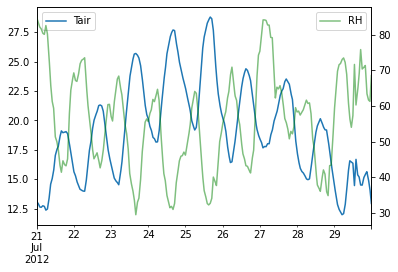

In [12]:
s = '2012 07 21'
e = '2012 07 29'
ax  =df_forcing.loc[s:e,'Tair'].plot()
ax2 = ax.twinx()
ax2  =df_forcing.loc[s:e,'RH'].plot(ax = ax2, color='g', alpha = 0.5)
ax.legend(loc='upper left')
ax2.legend()


<AxesSubplot:xlabel='datetime'>

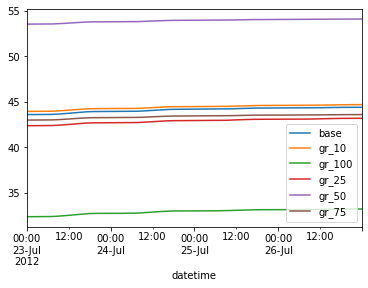

In [13]:
s = '2012 07 23'
e = '2012 07 26'
df_merge.loc[s:e, 'SMD'].plot()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='98f8e07a-c34e-4cbf-bc31-7e88e7851ea8'>)

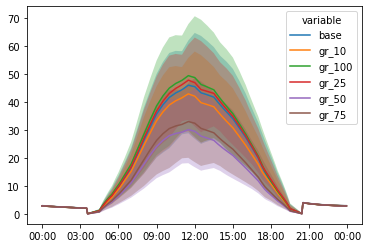

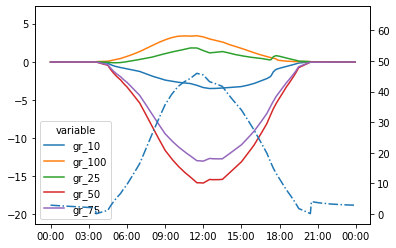

In [14]:

sp.util.plot_day_clm(df_merge.loc[s:e,'QE'])
sp.util.plot_day_clm(df_merge.loc[s:e,'QE'],show_dif =True, col_ref =('base'))


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='331f42b8-f3b0-4202-ae31-18368f9819b1'>)

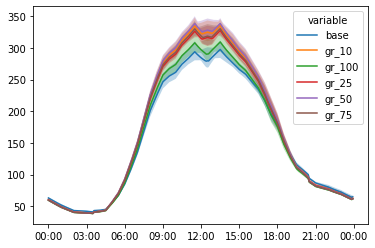

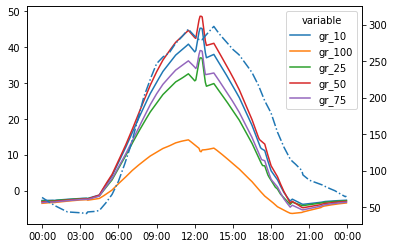

In [15]:
sp.util.plot_day_clm(df_merge.loc[s:e,'QH'])
sp.util.plot_day_clm(df_merge.loc[s:e,'QH'],show_dif =True, col_ref =('base'))


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='c1bbce2c-77e0-4a39-a931-8e75311d2a4a'>)

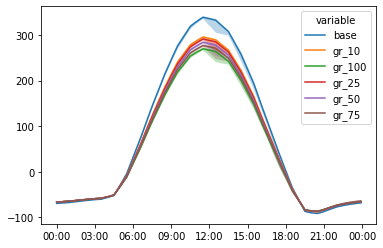

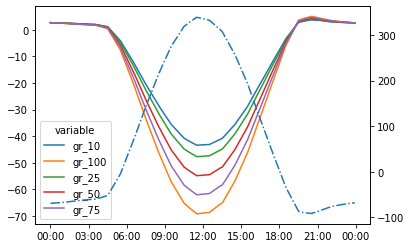

In [16]:
sp.util.plot_day_clm(df_merge.loc[s:e,'QS'])
sp.util.plot_day_clm(df_merge.loc[s:e,'QS'],show_dif =True, col_ref =('base'))


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='827e79d9-725c-407d-b4a7-5a0211fdaf26'>)

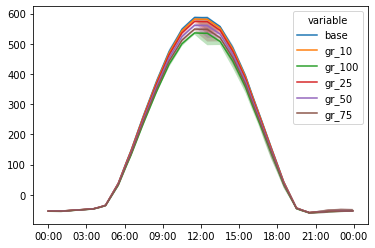

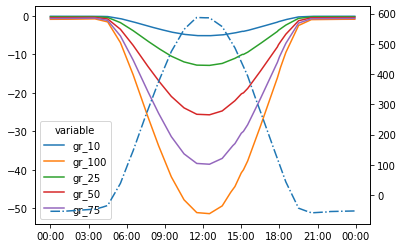

In [17]:
sp.util.plot_day_clm(df_merge.loc[s:e,'QN'])
sp.util.plot_day_clm(df_merge.loc[s:e,'QN'],show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='a95e1ef0-fb75-4781-9b25-6cff9740e319'>)

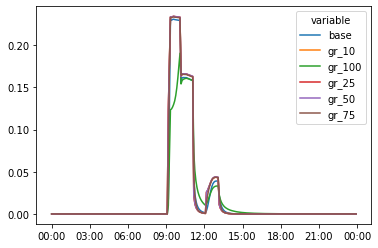

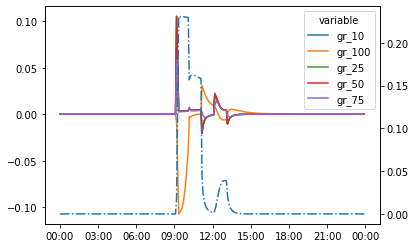

In [18]:
sp.util.plot_day_clm(df_merge.loc['2012 08 05':'2012 08 05','RO'])
sp.util.plot_day_clm(df_merge.loc['2012 08 05':'2012 08 05','RO'],show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='16e2cdc0-a984-4bc2-a999-f02554ccca8e'>)

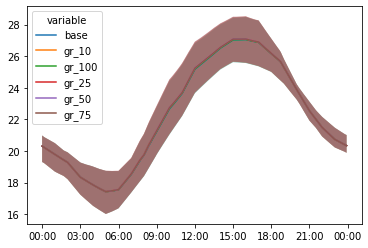

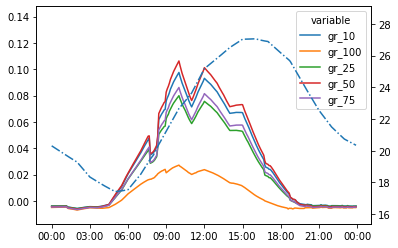

In [19]:
sp.util.plot_day_clm(df_merge.loc[s:e,'T2'])
sp.util.plot_day_clm(df_merge.loc[s:e,'T2'],show_dif =True, col_ref =('base'))

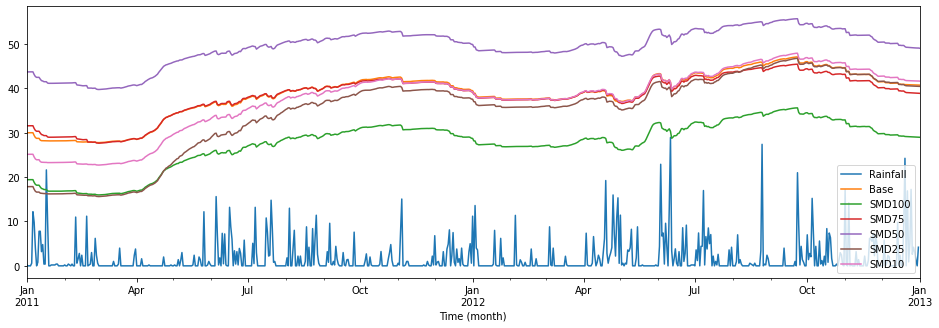

In [20]:
df_dailystate = (
    df_output.loc[1, "DailyState"].dropna(how="all").resample("1d").mean()
)
# daily rainfall
ser_p = df_dailystate.P_day.rename("Rainfall")
ser_smd = base.SUEWS.SMD
ser_smd_dmax = ser_smd.resample("1d").max().rename("Base")

smd_100 = gr_100.SUEWS.SMD
ser_100_max = smd_100.resample("1d").max().rename("SMD100")

smd_75 = gr_75.SUEWS.SMD
ser_75_max = smd_75.resample("1d").max().rename("SMD75")

smd_50 = gr_50.SUEWS.SMD
ser_50_max = smd_50.resample("1d").max().rename("SMD50")

smd_25 = gr_25.SUEWS.SMD
ser_25_max = smd_25.resample("1d").max().rename("SMD25")

smd_10 = gr_10.SUEWS.SMD
ser_10_max = smd_10.resample("1d").max().rename("SMD10")

ax = pd.concat([ser_p, ser_smd_dmax,ser_100_max,ser_75_max,ser_50_max,ser_25_max,ser_10_max], axis=1).plot(secondary_y="SMD", figsize=(16, 5))
_ = ax.set_xlabel("Time (month)")

